In [1]:
import numpy as np
import torch 
from torch import optim
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
from utils import *
%matplotlib inline
%reload_ext autoreload
%autoreload 2
torch.__version__

'1.1.0'

In [2]:
BATCH_SIZE = 64
LOG_INTERVAL = 200
CUDA = torch.cuda.is_available()

In [3]:
def sample_data_1():
    count = 100000
    rand = np.random.RandomState(0)
    return [[1.0, 2.0]] + rand.randn(count, 2) * [[5.0, 1.0]]
def sample_data_2():
    count = 100000
    rand = np.random.RandomState(0)
    return [[1.0, 2.0]] + (rand.randn(count, 2) * [[5.0, 1.0]]).dot(
        [[np.sqrt(2) / 2, np.sqrt(2) / 2], [-np.sqrt(2) / 2, np.sqrt(2) / 2]])

In [4]:
torch.manual_seed(0)
device = torch.device("cuda" if CUDA else "cpu")

In [5]:
data1 = np.asarray(sample_data_1(), dtype=np.float32)
data2 = np.asarray(sample_data_2(), dtype=np.float32)

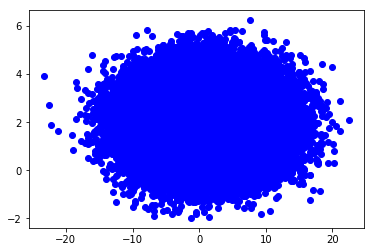

In [6]:
plt.plot(data1[:,0],data1[:,1], 'bo')

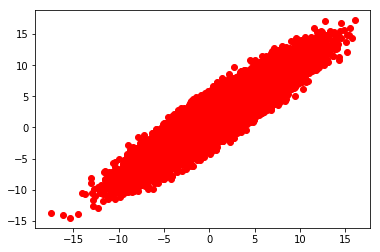

In [7]:
plt.plot(data2[:,0],data2[:,1],'ro')

In [8]:
data1_tensor = torch.from_numpy(data1).to(device)
data2_tensor = torch.from_numpy(data2).to(device)

In [9]:
dset1 = Data.TensorDataset(data1_tensor)
dset2 = Data.TensorDataset(data2_tensor)

In [10]:
dset1_loader = Data.DataLoader(
    dataset=dset1,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=1,
)

dset2_loader = Data.DataLoader(
    dataset=dset2,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=1,
)

In [13]:
def train(epoch, model, optimizer, train_loader):
    # toggle model to train mode
    model.train()
    train_loss = 0
    # in the case of MNIST, len(train_loader.dataset) is 60000
    # each `data` is of BATCH_SIZE samples and has shape [128, 1, 28, 28]
    for batch_idx, [data] in enumerate(train_loader):
        #data = Variable(data.type(torch.FloatTensor))
        if CUDA:
            data = data.cuda()
        optimizer.zero_grad()

        # push whole batch of data through VAE.forward() to get recon_loss
        recon_batch, mu, logvar = model(data)
        # calculate scalar loss
        loss = model.loss_function(recon_batch, data, mu, logvar)
        # calculate the gradient of the loss w.r.t. the graph leaves
        # i.e. input variables -- by the power of pytorch!
        loss.backward()
        train_loss += loss.data
        optimizer.step()
        if batch_idx % LOG_INTERVAL == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.data / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))

In [16]:
if __name__ == "__main__":

    #Take only 1000 images in test
    #test_dataset = CelebaDataset(root_dir, image_files[100000:101000], (128, 128), transforms.Compose([ToTensor()]))
    # test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=10, shuffle=True)

    EPOCHS = 10
    model = SimpleVAE(1)
    if CUDA: model.cuda()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(1, EPOCHS + 1):
        train(epoch, model, optimizer, dset2_loader)
        #test(epoch, model, test_loader)

        # 64 sets of random ZDIMS-float vectors, i.e. 64 locations / MNIST
        # digits in latent space
        sample = Variable(torch.randn(64, 16, 8, 8))
        if CUDA:
            sample = sample.cuda()
        #sample = model.decode(sample).cpu()

        # save out as an 8x8 matrix of MNIST digits
        # this will give you a visual idea of how well latent space can generate things
        # that look like digits
        #save_image(sample.data.view(64, 3, 128, 128), './celeba/reconstruction' + str(epoch) + '.png')

Train Epoch: 1 [0/100000 (0%)]	Loss: 0.389066
Train Epoch: 1 [12800/100000 (13%)]	Loss: 0.166813
Train Epoch: 1 [25600/100000 (26%)]	Loss: 0.245536
Train Epoch: 1 [38400/100000 (38%)]	Loss: 0.240460
Train Epoch: 1 [51200/100000 (51%)]	Loss: 0.169483
Train Epoch: 1 [64000/100000 (64%)]	Loss: 0.181881
Train Epoch: 1 [76800/100000 (77%)]	Loss: 0.178031
Train Epoch: 1 [89600/100000 (90%)]	Loss: 0.209883
====> Epoch: 1 Average loss: 0.2056
Train Epoch: 2 [0/100000 (0%)]	Loss: 0.210633
Train Epoch: 2 [12800/100000 (13%)]	Loss: 0.243655
Train Epoch: 2 [25600/100000 (26%)]	Loss: 0.186672
Train Epoch: 2 [38400/100000 (38%)]	Loss: 0.228026
Train Epoch: 2 [51200/100000 (51%)]	Loss: 0.243006
Train Epoch: 2 [64000/100000 (64%)]	Loss: 0.158784
Train Epoch: 2 [76800/100000 (77%)]	Loss: 0.220929
Train Epoch: 2 [89600/100000 (90%)]	Loss: 0.219228
====> Epoch: 2 Average loss: 0.2027
Train Epoch: 3 [0/100000 (0%)]	Loss: 0.240458
Train Epoch: 3 [12800/100000 (13%)]	Loss: 0.224109
Train Epoch: 3 [25600/100

Traceback (most recent call last):
  File "/Users/shanwu/anaconda3/envs/nlp/lib/python3.6/multiprocessing/queues.py", line 247, in _feed
    send_bytes(obj)
  File "/Users/shanwu/anaconda3/envs/nlp/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/shanwu/anaconda3/envs/nlp/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/shanwu/anaconda3/envs/nlp/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

In [7]:
class foo(nn.Module):
    def __init__(self):
        super(foo, self).__init__()
        pass
    
    def forward(self):
        print('yes')
    
    def test(self, x):
        print(f'x: {x}')

In [8]:
f = foo()

In [9]:
f.test('dsf')

x: dsf
